In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
from collections import Counter
import pywt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis,entropy
from sklearn.preprocessing import MinMaxScaler
from scipy.fftpack import fft, fftfreq
from sklearn.metrics import classification_report,confusion_matrix
from scipy.fft import fft, fftfreq

## ECG SIGNAL 10

##### DATA LOAD AND NAN VALU REMOVE

In [119]:

data10=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (10).csv")
data10=data10.fillna(0)
data10

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
241189,0,1123
241190,0,1114
241191,0,1122
241192,0,1121


## ECG SIGNAL 11

##### DATA LOAD AND NAN VALU REMOVE

In [123]:
data11=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG(11).csv")
data11=data11.fillna(0)
data11

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
46046,0,207
46047,0,231
46048,0,249
46049,0,265


## ECG SIGNAL 12

##### DATA LOAD AND NAN VALU REMOVE

In [127]:
data12=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (12).csv")
data12=data12.fillna(0)
data12

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
256617,0,942
256618,0,952
256619,0,951
256620,0,936


## ECG SIGNAL 13

##### DATA LOAD AND NAN VALU REMOVE

In [131]:
data13=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (13).csv")
data13=data13.fillna(0)
data13

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
272828,0,1109
272829,0,1120
272830,0,1116
272831,0,1128


## ECG SIGNAL 14

##### DATA LOAD AND NAN VALU REMOVE

In [135]:
data14=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (14).csv")
data14=data14.fillna(0)
data14

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
284784,0,1108
284785,0,1114
284786,0,1120
284787,0,1128


## ECG SIGNAL 15

##### DATA LOAD AND NAN VALU REMOVE

In [139]:
data15=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (15).csv")
data15=data15.fillna(0)
data15

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
297104,0,925
297105,0,873
297106,0,803
297107,0,771


## ECG SIGNAL 16

##### DATA LOAD AND NAN VALU REMOVE

In [143]:
data16=pd.read_csv("C:\\Users\\bhuni\\Downloads\\ECG (16).csv")
data16=data16.fillna(0)
data16

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
324767,0,954
324768,0,938
324769,0,949
324770,0,960


In [145]:
ecg_signal10=data10.iloc[0:241194,1:2] .values.ravel()
ecg_signal10
ecg_signal10.shape

(241194,)

In [147]:
ecg_signal11=data10.iloc[0:46051,1:2] .values.ravel()
ecg_signal11
ecg_signal11.shape

(46051,)

In [149]:
ecg_signal12=data10.iloc[0:256622,1:2] .values.ravel()
ecg_signal12
ecg_signal12.shape

(241194,)

In [151]:
ecg_signal13=data13.iloc[0:272833,1:2] .values.ravel()
ecg_signal13
ecg_signal13.shape

(272833,)

In [153]:
ecg_signal14=data14.iloc[0:284789,1:2] .values.ravel()
ecg_signal14
ecg_signal14.shape

(284789,)

In [155]:
ecg_signal15=data15.iloc[0:297109,1:2] .values.ravel()
ecg_signal15
ecg_signal15.shape

(297109,)

In [157]:
ecg_signal16=data16.iloc[0:324772,1:2] .values.ravel()
ecg_signal16
ecg_signal16.shape

(324772,)

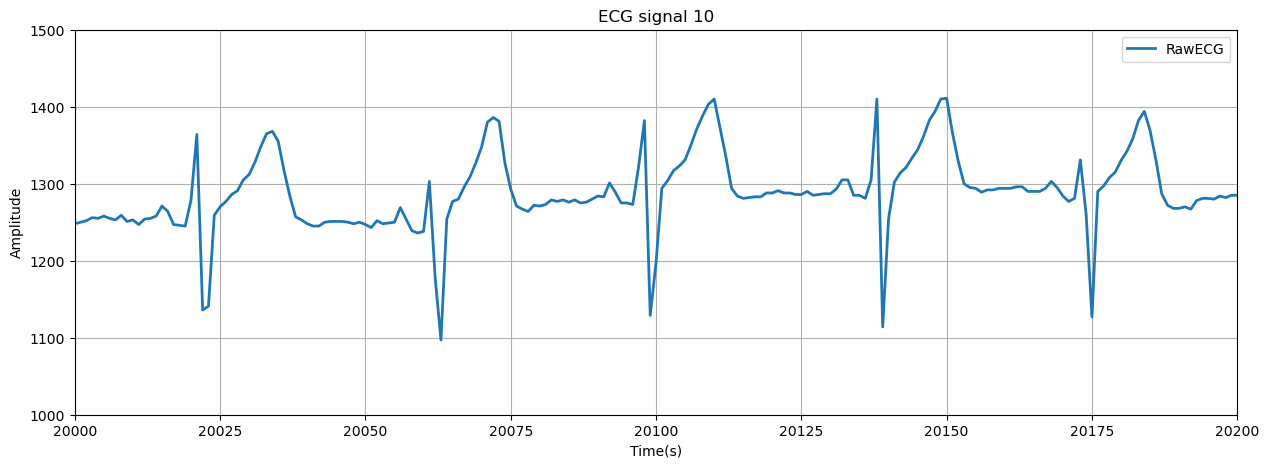

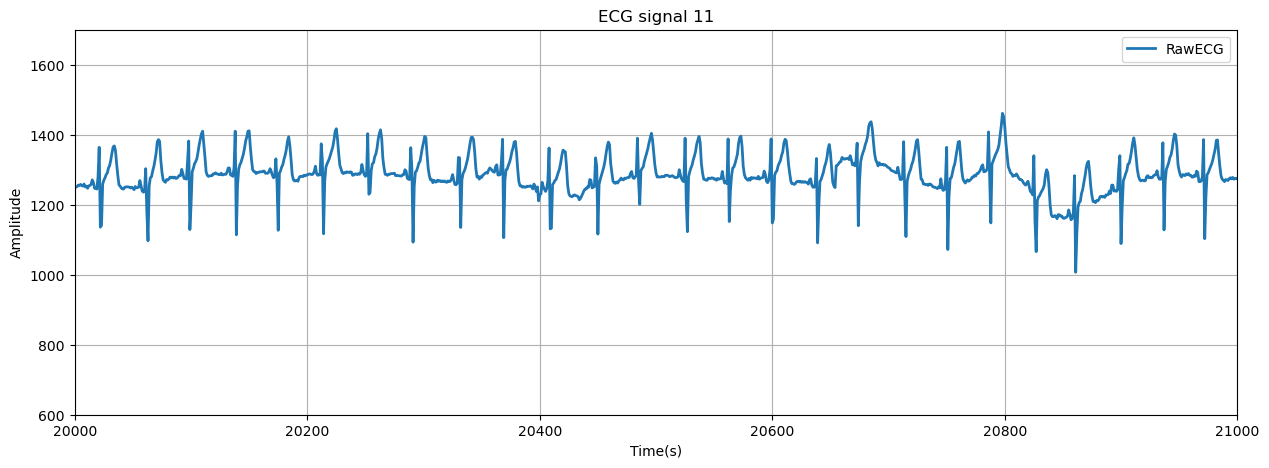

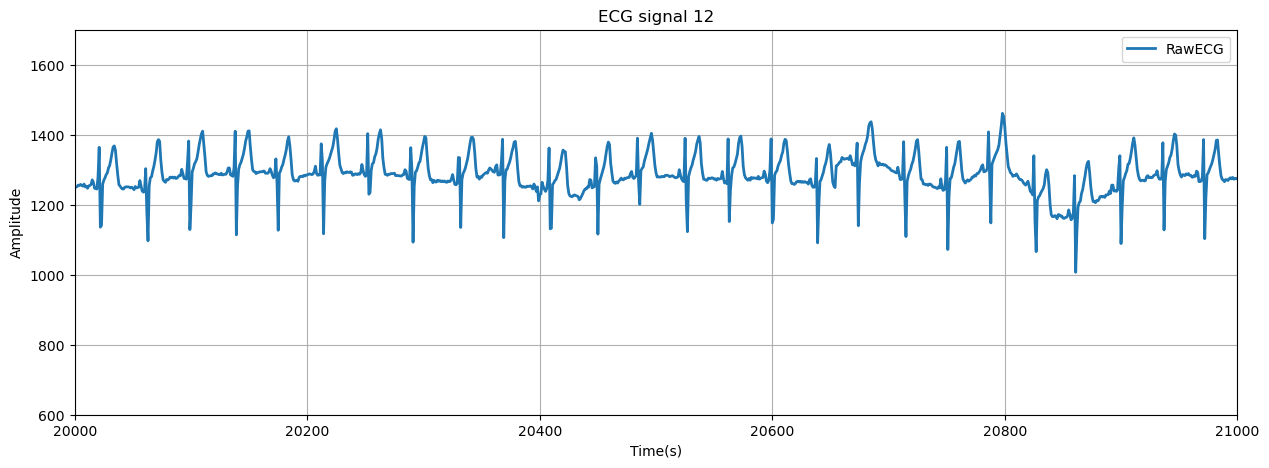

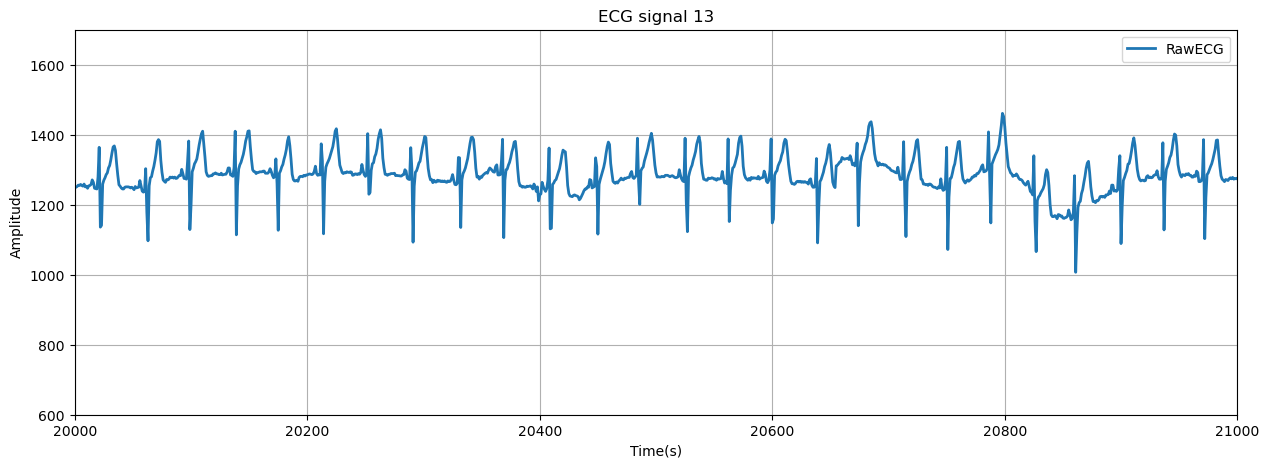

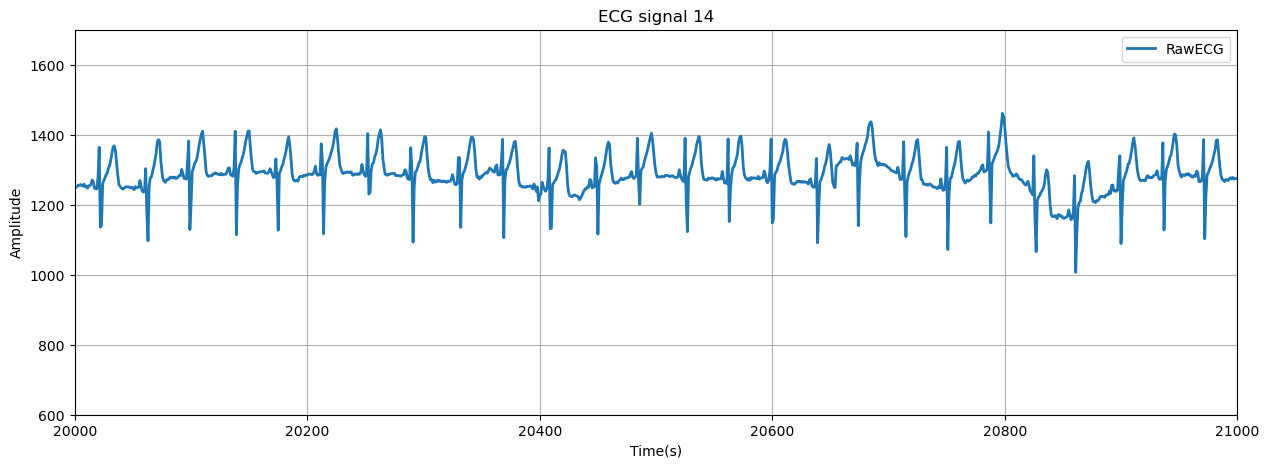

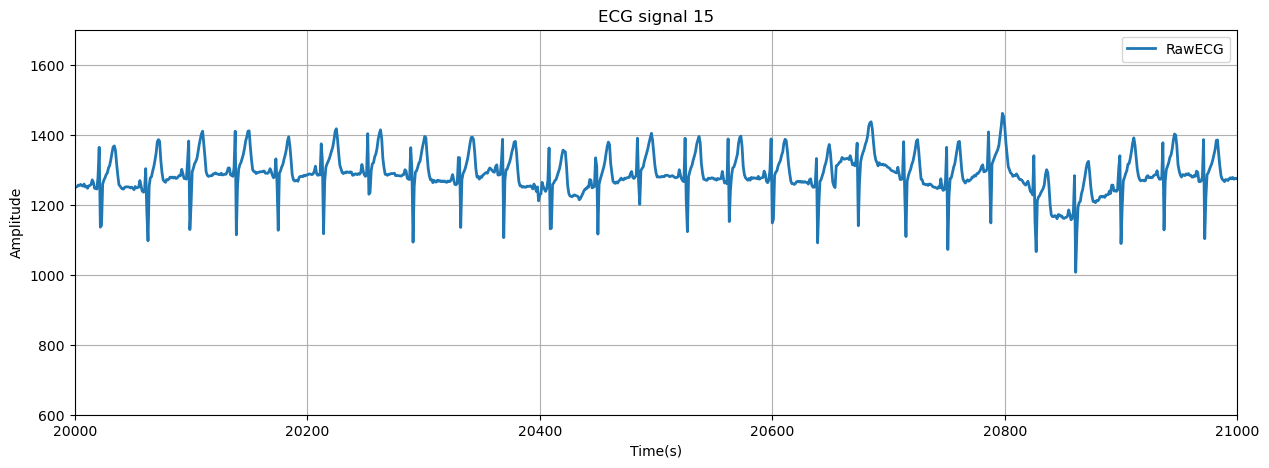

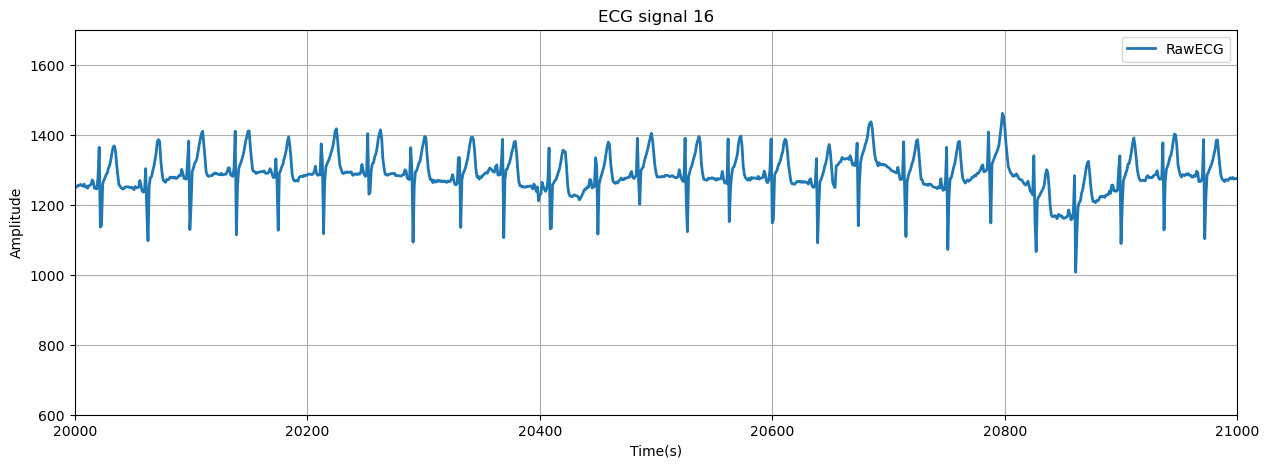

In [159]:
plt.figure(figsize=(15,5))
plt.plot(ecg_signal10,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 10')
plt.xlim([20000,20200])
plt.ylim([1000,1500])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal11,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 11')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal12,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 12')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal13,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 13')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal14,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 14')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal15,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 15')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(ecg_signal16,linewidth=2,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG signal 16')
plt.xlim([20000,21000])
plt.ylim([600,1700])
plt.grid(True)
plt.legend()
plt.show()

## FFT

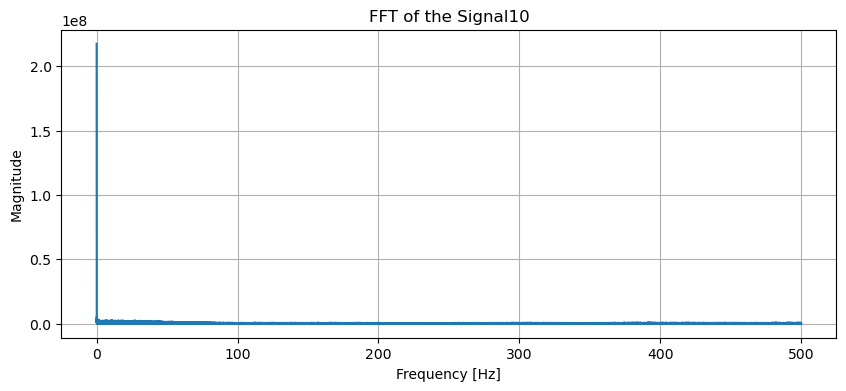

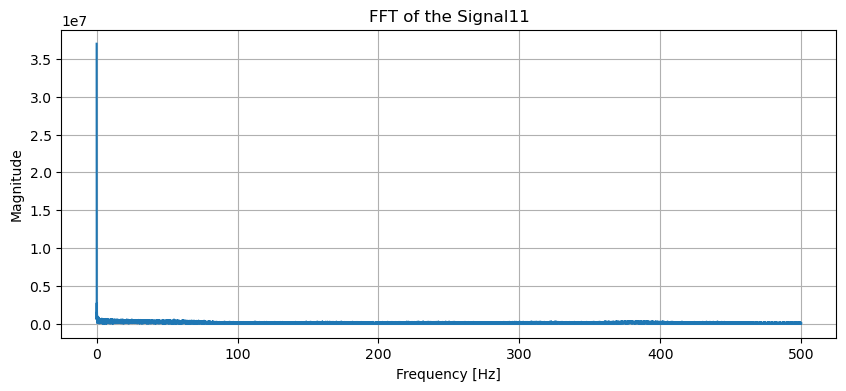

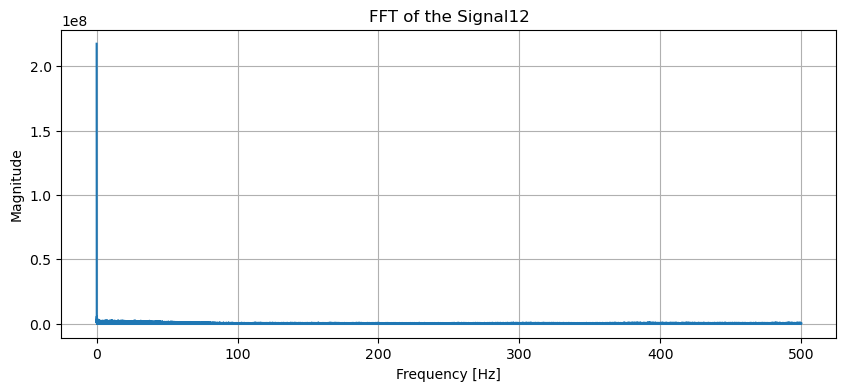

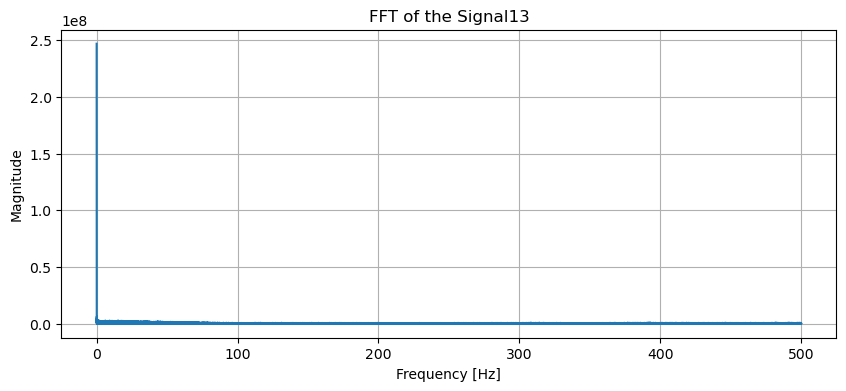

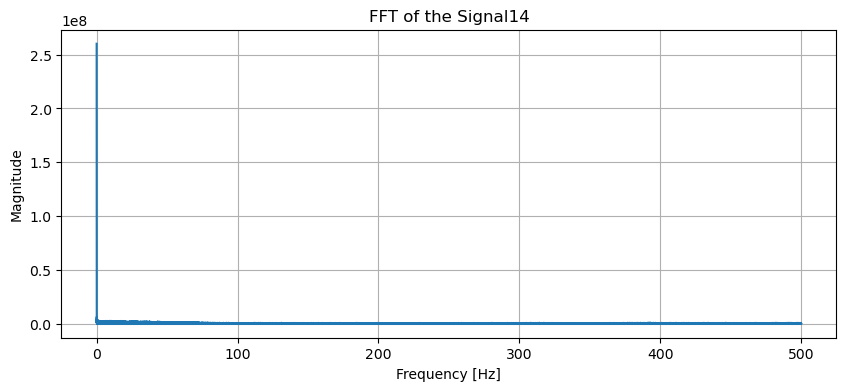

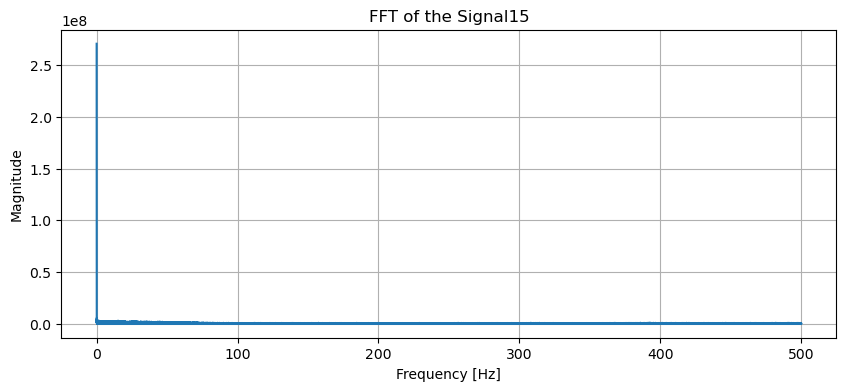

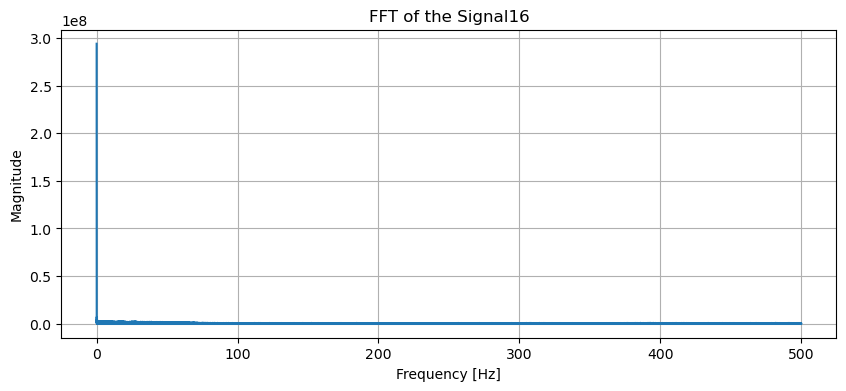

In [161]:
fs=1000
t = np.arange(len(ecg_signal10)) / fs
N = len(t)
yf = fft(ecg_signal10)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal10')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal11)) / fs
N = len(t)
yf = fft(ecg_signal11)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal11')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal12)) / fs
N = len(t)
yf = fft(ecg_signal12)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal12')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal13)) / fs
N = len(t)
yf = fft(ecg_signal13)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal13')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal14)) / fs
N = len(t)
yf = fft(ecg_signal14)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal14')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal15)) / fs
N = len(t)
yf = fft(ecg_signal15)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal15')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

t = np.arange(len(ecg_signal16)) / fs
N = len(t)
yf = fft(ecg_signal16)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))  # Plot only positive frequencies
plt.title('FFT of the Signal16')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

## REMOVE DC OFFSET AND FILTER APPLY

In [163]:
ecg_signal10=ecg_signal10 - np.mean(ecg_signal10)
ecg_signal11=ecg_signal11 - np.mean(ecg_signal11)
ecg_signal12=ecg_signal12 - np.mean(ecg_signal12)
ecg_signal13=ecg_signal13 - np.mean(ecg_signal13)
ecg_signal14=ecg_signal14 - np.mean(ecg_signal14)
ecg_signal15=ecg_signal15 - np.mean(ecg_signal15)
ecg_signal16=ecg_signal16 - np.mean(ecg_signal16)

In [165]:
from scipy import signal
import matplotlib.pyplot as plt
#APPLY FILTER(LOW PASS FILTER)
# Design a Butterworth low-pass filter
# Design filter
# Ensure ecg_signal has same length as t
ecg_signal_10 = ecg_signal10[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_10 = signal.filtfilt(b, a, ecg_signal_10)

ecg_signal_11 = ecg_signal11[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_11 = signal.filtfilt(b, a, ecg_signal_11)

ecg_signal_12 = ecg_signal12[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_12 = signal.filtfilt(b, a, ecg_signal_12)

ecg_signal_13 = ecg_signal13[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_13 = signal.filtfilt(b, a, ecg_signal_13)

ecg_signal_14 = ecg_signal14[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_14 = signal.filtfilt(b, a, ecg_signal_14)

ecg_signal_15 = ecg_signal15[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_15 = signal.filtfilt(b, a, ecg_signal_15)

ecg_signal_16 = ecg_signal16[:len(t)] 
b, a = signal.butter(4, 25, fs=fs, btype='low')
filtered_signal_16 = signal.filtfilt(b, a, ecg_signal_16)

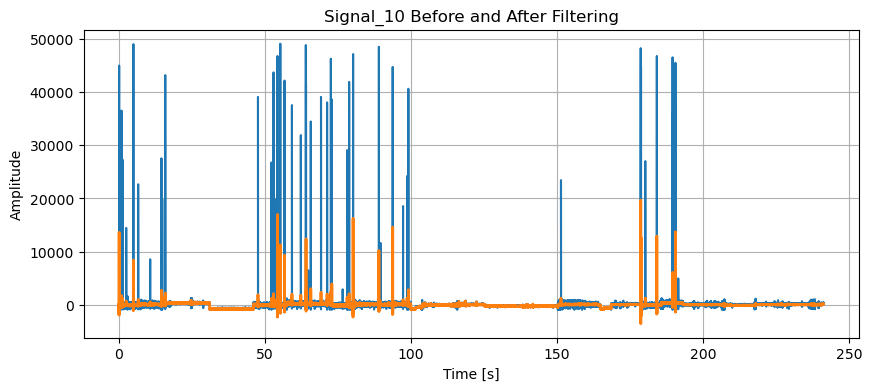

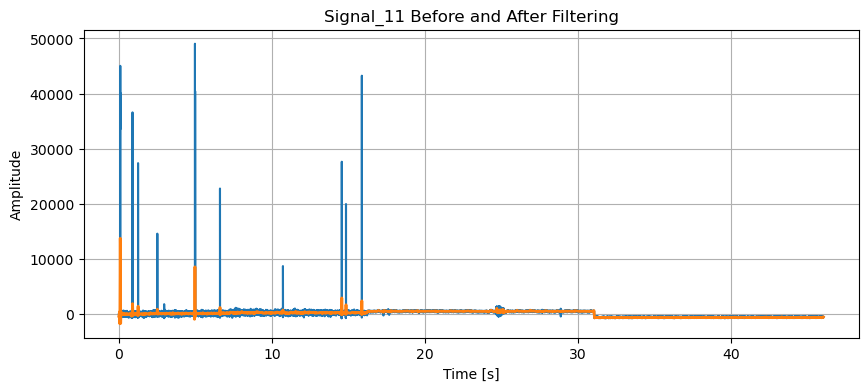

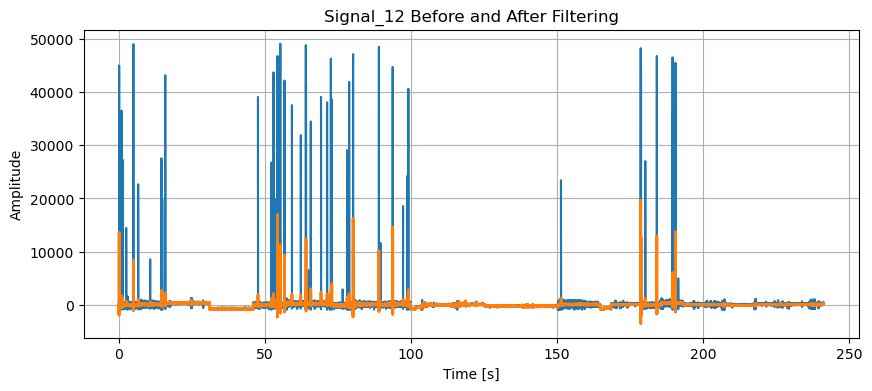

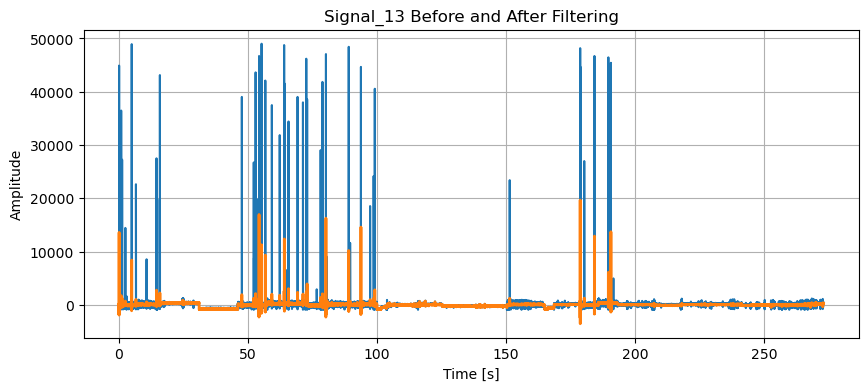

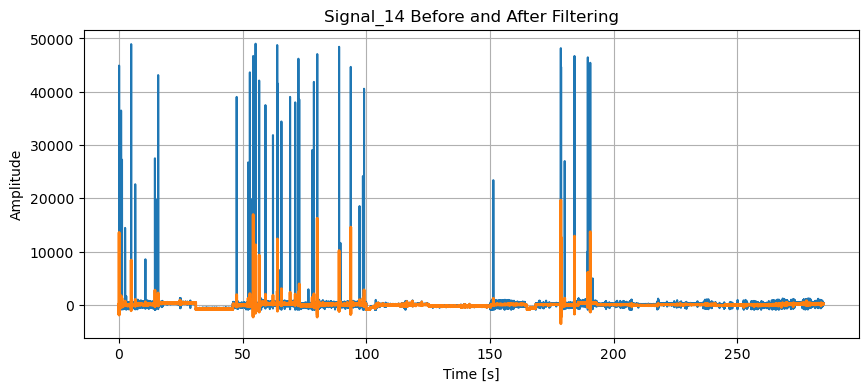

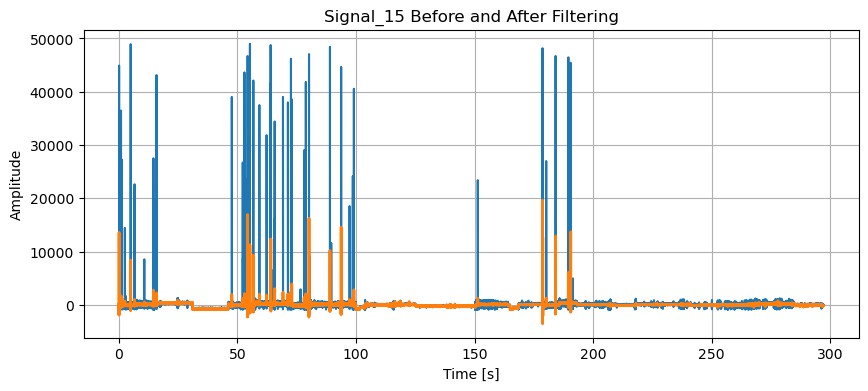

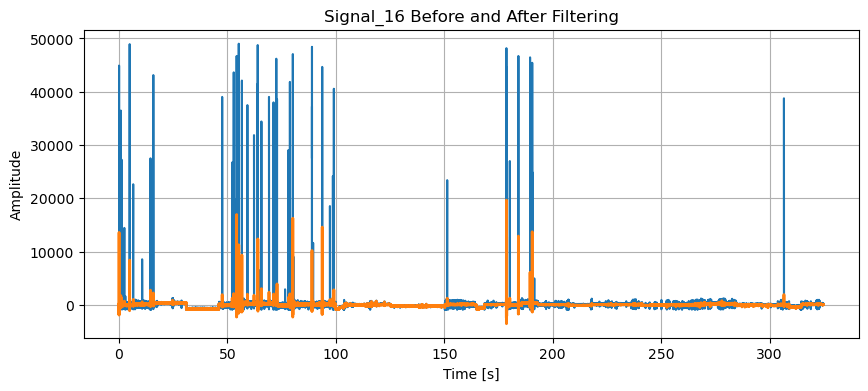

In [166]:
# Truncate both signals to the length of the shortest one
min_len = min(len(t), len(ecg_signal10), len(filtered_signal_10))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_10[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_10[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_10 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal11), len(filtered_signal_11))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_11[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_11[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_11 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal12), len(filtered_signal_12))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_12[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_12[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_12 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal13), len(filtered_signal_13))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_13[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_13[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_13 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal14), len(filtered_signal_14))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_14[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_14[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_14 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal15), len(filtered_signal_15))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_15[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_15[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_15 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

min_len = min(len(t), len(ecg_signal16), len(filtered_signal_16))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], ecg_signal_16[:min_len], label='Original')
plt.plot(t[:min_len], filtered_signal_16[:min_len], label='Filtered', linewidth=2)
plt.title('Signal_16 Before and After Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Detect R Peak

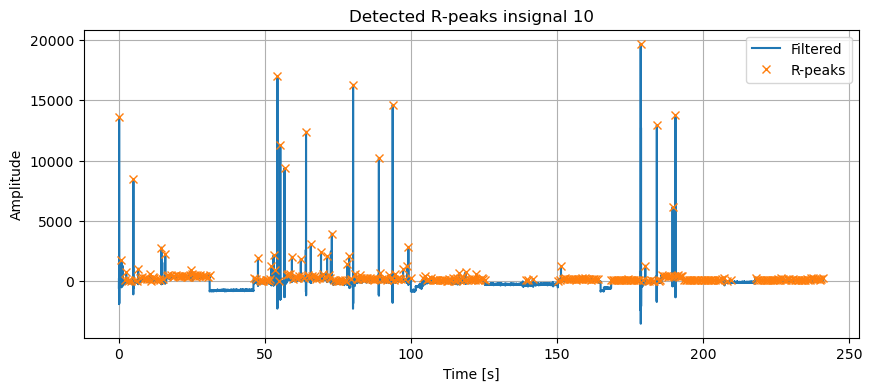

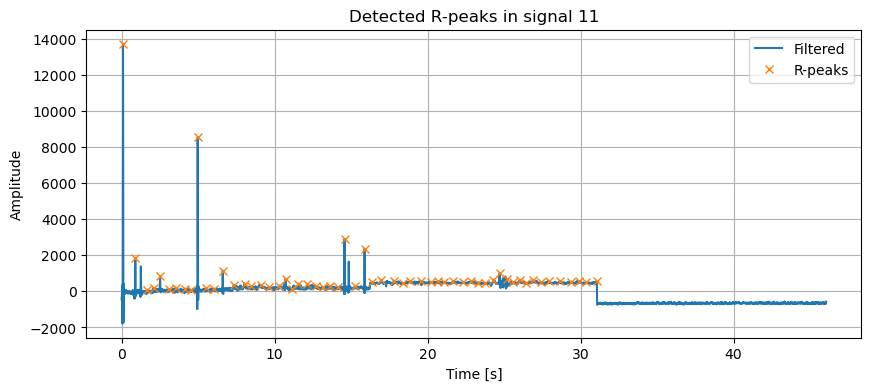

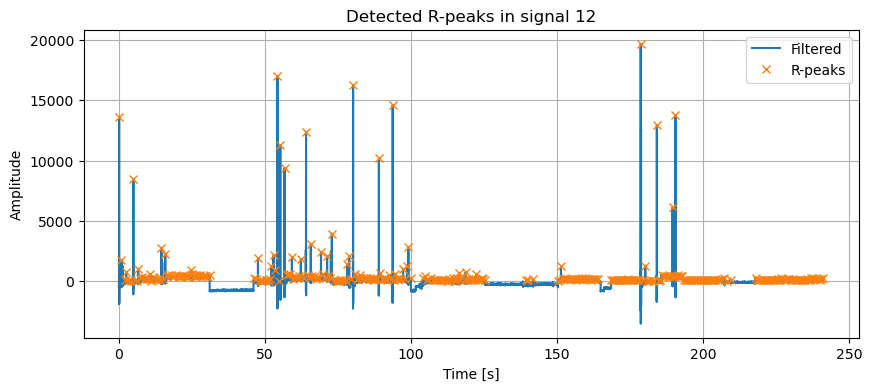

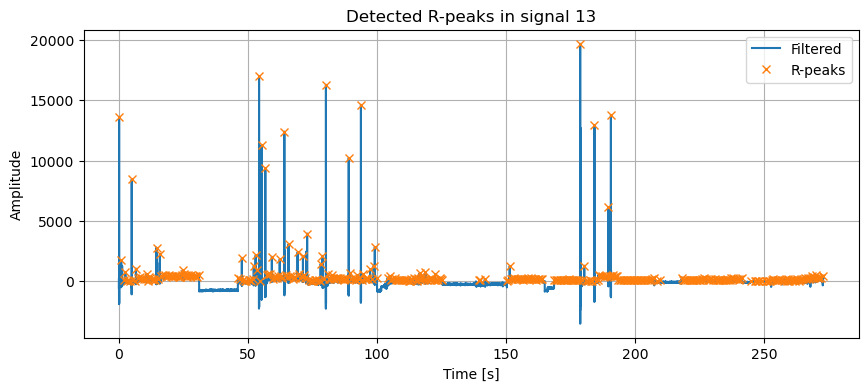

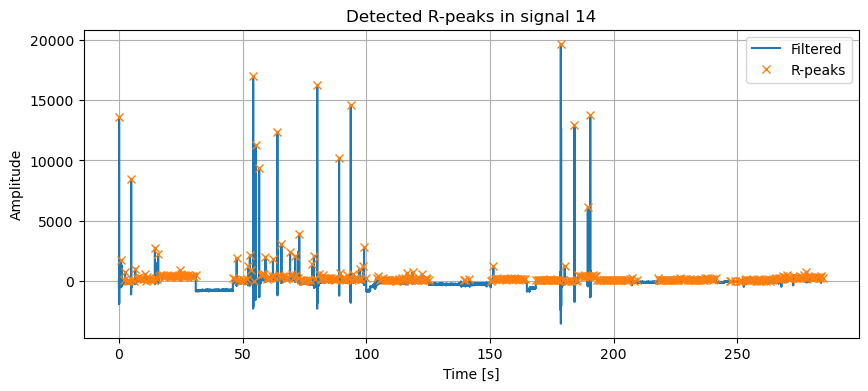

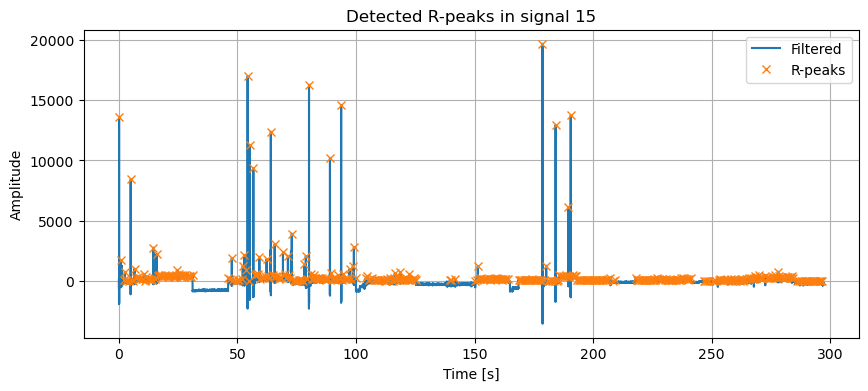

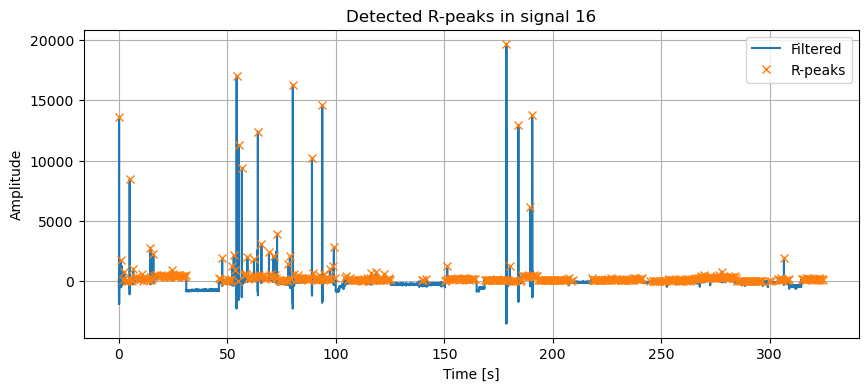

In [171]:
from scipy import signal
import matplotlib.pyplot as plt
#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_10, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_10))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_10[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_10[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks insignal 10")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_11, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_11))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_11[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_11[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 11")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_12, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_12))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_12[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_12[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 12")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_13, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_13))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_13[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_13[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 13")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_14, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_14))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_14[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_14[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 14")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_15, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_15))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_15[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_15[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 15")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#Find R peak
peaks, _ = signal.find_peaks(filtered_signal_16, distance=fs/2.5, height=0.5)
#plot ecg signal and detected R peak
min_len = min(len(t), len(filtered_signal_16))
plt.figure(figsize=(10, 4))
plt.plot(t[:min_len], filtered_signal_16[:min_len], label='Filtered')
plt.plot(t[peaks], filtered_signal_16[peaks], "x", label='R-peaks')  # This also assumes `peaks` are within min_len
plt.title("Detected R-peaks in signal 16")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### FEATURE EXTRACTION find min, max, mean, median, standard deviation

In [173]:
import statistics as stat
import scipy.stats as scst

In [175]:
# Convert to float list for compatibility
signal_list_10 = filtered_signal_10.astype(float).tolist()
signal_list_11 = filtered_signal_11.astype(float).tolist()
signal_list_12 = filtered_signal_12.astype(float).tolist()
signal_list_13 = filtered_signal_13.astype(float).tolist()
signal_list_14 = filtered_signal_14.astype(float).tolist()
signal_list_15 = filtered_signal_15.astype(float).tolist()
signal_list_16 = filtered_signal_16.astype(float).tolist()

In [179]:
print(["minimum,maximum,mean,median,standard deviation"])
print("\n")
print("For signal 10")
min_10= np.min(filtered_signal_10)
max_10= np.max(filtered_signal_10)
mean_10= np.mean(filtered_signal_10)
median_10= np.median(filtered_signal_10)
STD_10= np.std(signal_list_10) 
print([min_10,max_10,mean_10,median_10,STD_10])
print("\n")
print("For signal 11")
min_11= np.min(filtered_signal_11)
max_11= np.max(filtered_signal_11)
mean_11= np.mean(filtered_signal_11)
median_11= np.median(filtered_signal_11)
STD_11= np.std(signal_list_11) 
print([min_11,max_11,mean_11,median_11,STD_11])
print("\n")
print("For signal 10")
min_12= np.min(filtered_signal_12)
max_12= np.max(filtered_signal_12)
mean_12= np.mean(filtered_signal_12)
median_12= np.median(filtered_signal_12)
STD_12= np.std(signal_list_12) 
print([min_12,max_12,mean_12,median_12,STD_12])
print("\n")
print("For signal 13")
min_13= np.min(filtered_signal_13)
max_13= np.max(filtered_signal_13)
mean_13= np.mean(filtered_signal_13)
median_13= np.median(filtered_signal_13)
STD_13= np.std(signal_list_13)
print([min_13,max_13,mean_13,median_13,STD_13])
print("\n")
print("For signal 14")
min_14= np.min(filtered_signal_14)
max_14= np.max(filtered_signal_14)
mean_14= np.mean(filtered_signal_14)
median_14= np.median(filtered_signal_14)
STD_14= np.std(signal_list_14) 
print([min_14,max_14,mean_14,median_14,STD_14])
print("\n")
print("For signal 15")
min_15= np.min(filtered_signal_15)
max_15= np.max(filtered_signal_15)
mean_15= np.mean(filtered_signal_15)
median_15= np.median(filtered_signal_15)
STD_15= np.std(signal_list_15) 
print([min_15,max_15,mean_15,median_15,STD_15])
print("\n")
print("For signal 16")
min_16= np.min(filtered_signal_16)
max_16= np.max(filtered_signal_16)
mean_16= np.mean(filtered_signal_16)
median_16= np.median(filtered_signal_16)
STD_16= np.std(signal_list_16) 
print([min_16,max_16,mean_16,median_16,STD_16])
print("\n")


['minimum,maximum,mean,median,standard deviation']


For signal 10
[-3513.330420724632, 19677.158999923144, -0.0061022344895058376, 56.60928479263177, 513.1010479930767]


For signal 11
[-1790.9343260859703, 13717.750714055319, -0.03179315785879813, 143.48587564486456, 578.3070245948503]


For signal 10
[-3513.330420724632, 19677.158999923144, -0.0061022344895058376, 56.60928479263177, 513.1010479930767]


For signal 13
[-3516.502702854493, 19673.986717787237, -0.005677588864936146, 47.02250080520838, 483.69790795494436]


For signal 14
[-3525.098266605483, 19665.391154041627, -0.005656160193732521, 44.56363865554745, 475.43512114308453]


For signal 15
[-3522.575299361179, 19667.914121288697, -0.006480855594475243, 40.41934746293192, 465.85380206680685]


For signal 16
[-3516.9363758646796, 19673.553044778426, -0.004350462292525419, 44.0122772263592, 449.93091193152867]




## average minimum,maximum,mean,median, standard deviation

In [182]:
avg_min = np.mean([min_10,min_11, min_12, min_13, min_14, min_15, min_16])
avg_max = np.mean([max_10,max_11, max_12, max_13, max_14, max_15, max_16])
avg_mean = np.mean([mean_10,mean_11, mean_12, mean_13, mean_14, mean_15, mean_16])
avg_median = np.mean([median_10,median_11, median_12, median_13, median_14, median_15, median_16])
avg_std = np.mean([STD_10,STD_11, STD_12, STD_13, STD_14, STD_15, STD_16])

print("Average Minimum:", avg_min)
print("Average Maximum:", avg_max)
print("Average Mean:", avg_mean)
print("Average Median:", avg_median)
print("Average Standard Deviation:", avg_std)


Average Minimum: -3271.2439731744385
Average Maximum: 18821.84482168537
Average Mean: -0.009451813397639878
Average Median: 61.81745848288215
Average Standard Deviation: 497.0609805253383


## organize feature in table

In [185]:
import pandas as pd

# Collect data into a dictionary
data = {
    "Signal": ["Signal_10","Signal_11", "Signal_12", "Signal_13", "Signal_14", "Signal_15", "Signal_16"],
    "Min": [min_10,min_11, min_12, min_13, min_14, min_15, min_16],
    "Max": [max_10,max_11, max_12, max_13, max_14, max_15, max_16],
    "Mean": [mean_10,mean_11, mean_12, mean_13, mean_14, mean_15, mean_16],
    "Median": [median_10,median_11, median_12, median_13, median_14, median_15, median_16],
    "STD": [STD_10,STD_11, STD_12, STD_13, STD_14, STD_15, STD_16],
}
df = pd.DataFrame(data)
print(df)

      Signal          Min           Max      Mean      Median         STD
0  Signal_10 -3513.330421  19677.159000 -0.006102   56.609285  513.101048
1  Signal_11 -1790.934326  13717.750714 -0.031793  143.485876  578.307025
2  Signal_12 -3513.330421  19677.159000 -0.006102   56.609285  513.101048
3  Signal_13 -3516.502703  19673.986718 -0.005678   47.022501  483.697908
4  Signal_14 -3525.098267  19665.391154 -0.005656   44.563639  475.435121
5  Signal_15 -3522.575299  19667.914121 -0.006481   40.419347  465.853802
6  Signal_16 -3516.936376  19673.553045 -0.004350   44.012277  449.930912


## visualisation of Feature

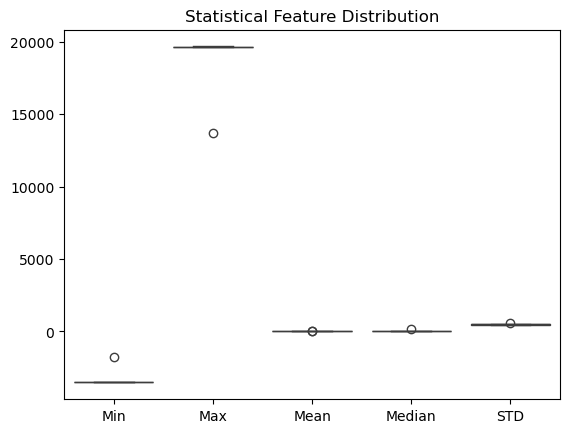

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df[["Min", "Max", "Mean", "Median", "STD"]])
plt.title("Statistical Feature Distribution")
plt.show()


## Outlier detection and removal using z-score and standard deviation

In [191]:
data10['zscore']=(data10.mV-avg_mean)/avg_std
data10.head(241194)

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
1,0,611,1.229244
2,0,919,1.848887
3,0,575,1.156819
4,0,563,1.132677
...,...,...,...
241189,0,1123,2.259299
241190,0,1114,2.241193
241191,0,1122,2.257287
241192,0,1121,2.255276


In [218]:
data_no_outlier_10=data10[(data10.zscore>-3) & (data10.zscore<3)]
data_no_outlier_10

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
1,0,611,1.229244
2,0,919,1.848887
3,0,575,1.156819
4,0,563,1.132677
...,...,...,...
241189,0,1123,2.259299
241190,0,1114,2.241193
241191,0,1122,2.257287
241192,0,1121,2.255276


In [220]:
data11['zscore']=(data11.mV-avg_mean)/avg_std
data_no_outlier_11=data11[(data11.zscore>-1) & (data11.zscore<1)]
data_no_outlier_11

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
46046,0,207,0.416467
46047,0,231,0.464751
46048,0,249,0.500964
46049,0,265,0.533153


In [222]:
data12['zscore']=(data12.mV-avg_mean)/avg_std
data_no_outlier_12=data12[(data12.zscore>-1) & (data11.zscore<1)]
data_no_outlier_12

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
46046,0,207,0.416467
46047,0,231,0.464751
46048,0,249,0.500964
46049,0,265,0.533153


In [224]:
data13['zscore']=(data13.mV-avg_mean)/avg_std
data_no_outlier_13=data13[(data13.zscore>-1) & (data13.zscore<1)]
data_no_outlier_13

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
272580,0,444,0.893270
272581,2025 07 18 09:04:55.388425,458,0.921435
272583,0,451,0.907352
272584,0,412,0.828891


In [226]:
data14['zscore']=(data14.mV-avg_mean)/avg_std
data_no_outlier_14=data14[(data14.zscore>-1) & (data14.zscore<1)]
data_no_outlier_14

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
283808,0,436,0.877175
283837,2025 07 18 09:12:58.762986,295,0.593508
283838,0,394,0.792678
283840,0,391,0.786643


In [228]:
data15['zscore']=(data15.mV-avg_mean)/avg_std
data_no_outlier_15=data15[(data15.zscore>-1) & (data15.zscore<1)]
data_no_outlier_15

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
283838,0,394,0.792678
283840,0,391,0.786643
284004,0,456,0.917411
288620,0,481,0.967707


In [230]:
data16['zscore']=(data16.mV-avg_mean)/avg_std
data_no_outlier_16=data11[(data16.zscore>-1) & (data16.zscore<1)]
data_no_outlier_16

C:\Users\bhuni\AppData\Local\Temp\ipykernel_10288\1879015801.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outlier_16=data11[(data16.zscore>-1) & (data16.zscore<1)]


,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,0.682028
37,0,365,0.734335
39,0,435,0.875163
54,0,493,0.991849
57,0,484,0.973743
...,...,...,...
46046,0,207,0.416467
46047,0,231,0.464751
46048,0,249,0.500964
46049,0,265,0.533153


## Autocorrelation

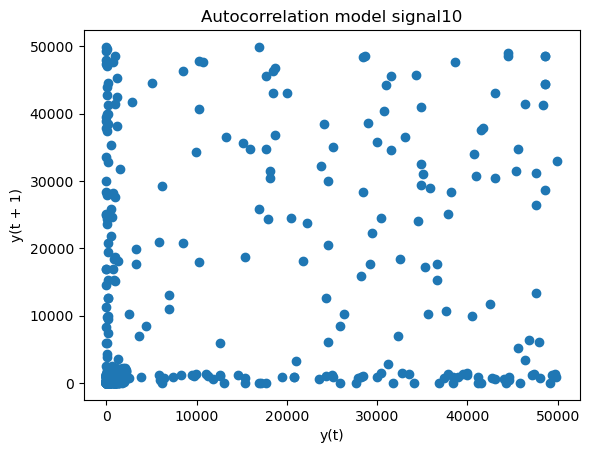

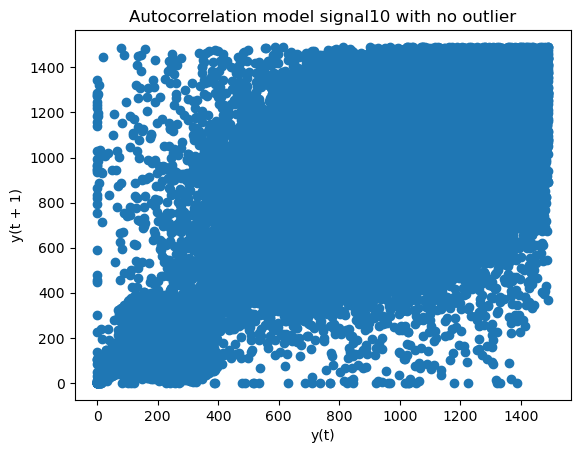

In [233]:

from matplotlib import pyplot
from pandas.plotting import lag_plot
series = data10.mV
lag_plot(series)
plt.title("Autocorrelation model signal10")
plt.show()

series = data_no_outlier_10.mV
lag_plot(series)
plt.title("Autocorrelation model signal10 with no outlier")
plt.show()

## Autocorrelation plot

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Step 1: Extract the cleaned signal series
series = data_no_outlier_10['mV']

# Step 2: Plot autocorrelation
autocorrelation_plot(series)
plt.title("Autocorrelation of Cleaned ECG Signal")
plt.grid(True)
plt.show()


## Persistence Model

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = data_no_outlier_10['mV']
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## Autoregression Model

Coefficients: [ 4.01823134e+00  3.88222204e-01  1.81302847e-01  1.22216891e-01
  6.20561567e-02  4.08419627e-02  1.60561913e-02 -2.76699772e-02
 -1.08430552e-02  2.31526574e-02  3.38046819e-02  3.50352392e-02
  3.66047151e-02 -4.69693407e-03 -1.37467717e-02 -2.57135233e-02
  8.98053195e-03  5.12374767e-03  1.41989284e-02 -1.85946023e-02
 -1.51384296e-02  2.49052050e-02  2.23325110e-02 -4.18041041e-04
 -2.59239942e-02  1.80493689e-02  1.70701056e-02  1.11133833e-02
  2.58029033e-02  3.60524847e-02]
predicted=402.077838, expected=494.000000
predicted=394.588222, expected=433.000000
predicted=399.043679, expected=300.000000
predicted=393.145873, expected=445.000000
predicted=381.967930, expected=462.000000
predicted=380.420580, expected=405.000000
predicted=372.063497, expected=418.000000
Test RMSE: 67.128


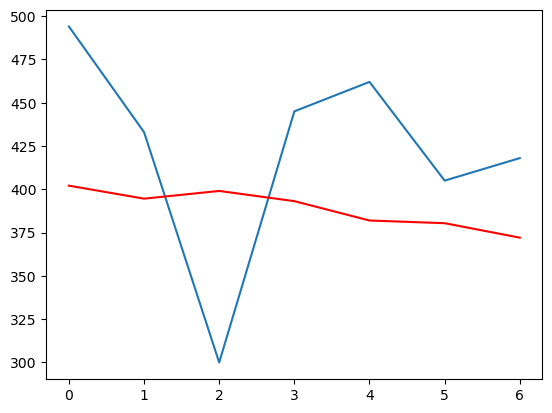

In [216]:

# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = data_no_outlier_10['mV']
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()